### Load Libraries

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import sys
import os

SCRIPT_DIR = os.path.dirname(os.path.abspath('../scripts/scripts/'))
sys.path.append(os.path.dirname(SCRIPT_DIR))

from scripts.constants import PATH_TO_DATA, DATA_FILE_NAME

import nltk

### Load Dataset

In [2]:
df = pd.read_csv(os.path.join(PATH_TO_DATA, DATA_FILE_NAME), sep='|', names=['sentiment', 'review'], encoding='latin-1')

### Basic EDA

In [3]:
rows, cols = df.shape
colnames = df.columns

print(f"--- Shape ---\nRows: {rows}\nCols: {cols}\n")
print("--- Column Names ---\n", ", ".join(colnames), sep='')

--- Shape ---
Rows: 8544
Cols: 2

--- Column Names ---
sentiment, review


<Axes: xlabel='sentiment', ylabel='count'>

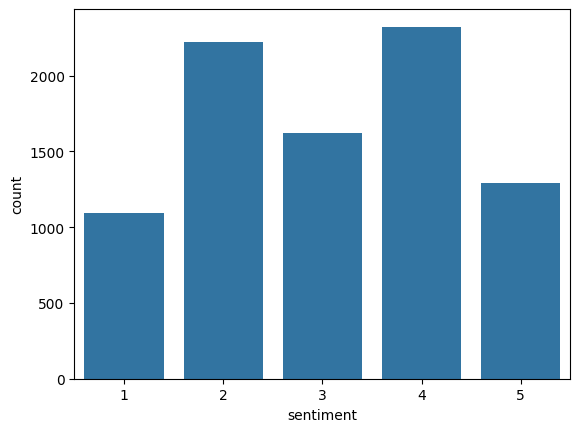

In [4]:
sns.countplot(data=df, x='sentiment')

<Axes: xlabel='n_char'>

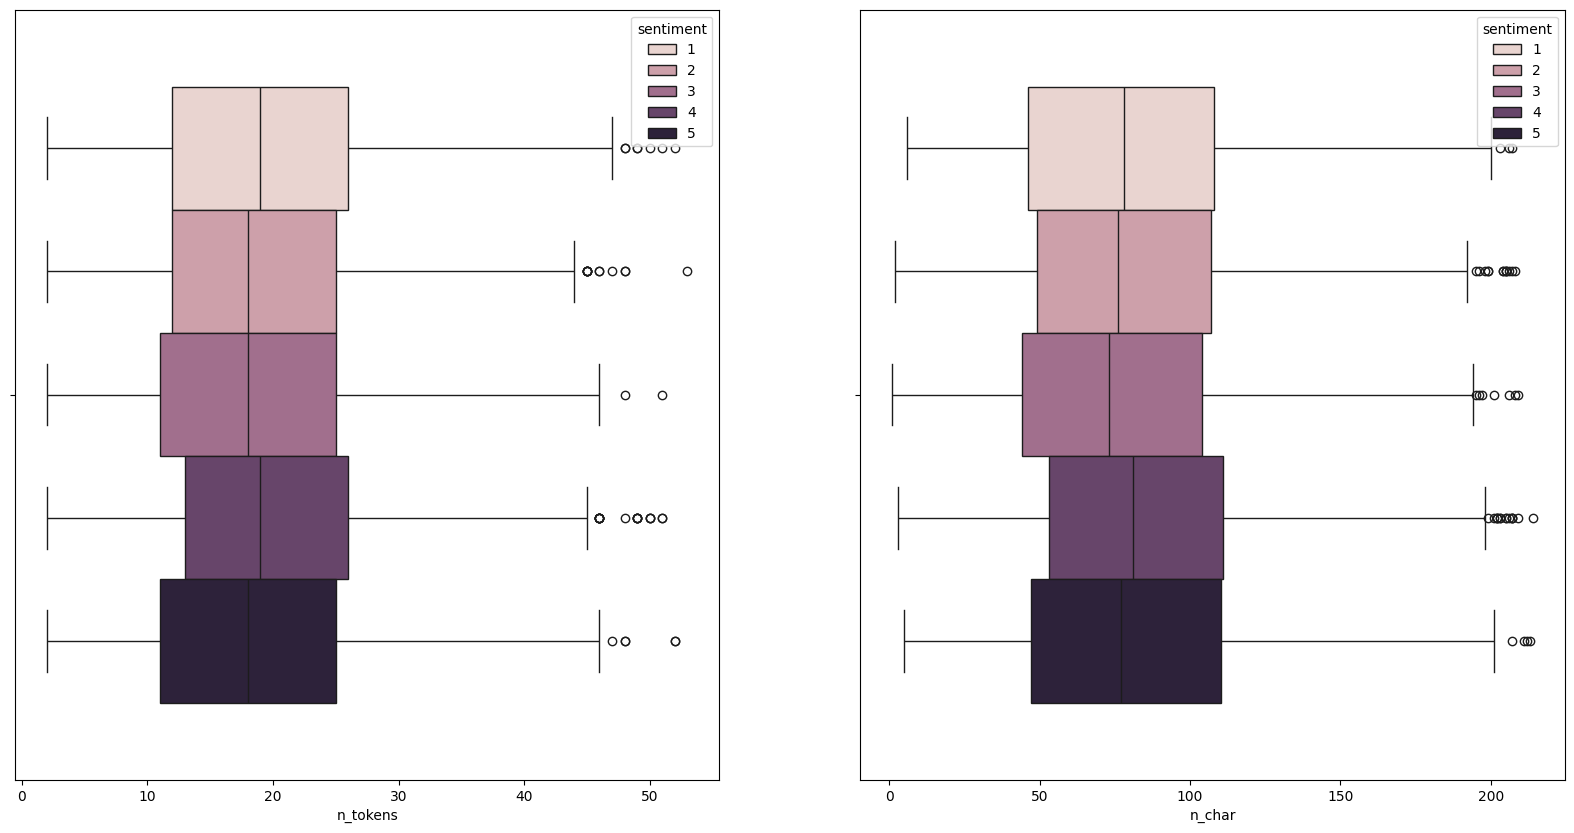

In [18]:
# Tokenize Reviews
df_copy = df.copy()
df_copy['n_tokens'] = df['review'].apply(lambda x: len(nltk.word_tokenize(x)))
df_copy['n_char'] = df['review'].apply(lambda x: len([c for c in x if c.isalpha()]))

# Visualise sentiments vs n_tokens
fig, [ax1, ax2] = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))
sns.boxplot(data=df_copy, x='n_tokens', hue='sentiment', ax=ax1)
sns.boxplot(data=df_copy, x='n_char', hue='sentiment', ax=ax2)

<Axes: xlabel='n_tokens', ylabel='n_char'>

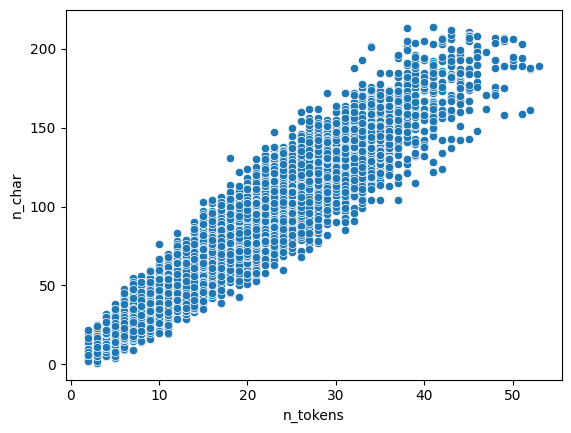

In [21]:
# Display distribution of n_char vs n_tokens
sns.scatterplot(data=df_copy, x='n_tokens', y='n_char')

In [20]:
# Display pearson correlation value between n_char and n_tokens
df_copy[['n_char', 'n_tokens']].corr()

,n_char,n_tokens
n_char,1.000000,0.949308
n_tokens,0.949308,1.000000


### Feature Engineering